In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

df = pd.read_csv('covid_19_indonesia_time_series_all.csv')

df.head(21759)



,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


# Measure of Central Tendency

## Mean

In [16]:
print (df['Total Cases'].mean())

85259.97081667357


## Median

In [17]:
print (df['Total Deaths'].median())

283.0


## Modus

In [18]:
print (df['Location'].mode())

0    DKI Jakarta
1      Indonesia
dtype: object


# Measure of Variance

## Range

In [19]:
numcols = ['Total Cases', 'Total Deaths', 'Total Recovered']
for col in numcols:
    print(df[col].name + ' range: ' + str(df[col].max() - df[col].min()))

Total Cases range: 4257242
Total Deaths range: 143858
Total Recovered range: 4105680


## Percentiles and Quartiles

### Percentiles

In [20]:
print(stats.percentileofscore(df['New Cases'], 4, 'strict'))

19.169079461372306


In [21]:
help(stats.percentileofscore)

Help on function percentileofscore in module scipy.stats.stats:

percentileofscore(a, score, kind='rank')
    Compute the percentile rank of a score relative to a list of scores.
    
    A `percentileofscore` of, for example, 80% means that 80% of the
    scores in `a` are below the given score. In the case of gaps or
    ties, the exact definition depends on the optional keyword, `kind`.
    
    Parameters
    ----------
    a : array_like
        Array of scores to which `score` is compared.
    score : int or float
        Score that is compared to the elements in `a`.
    kind : {'rank', 'weak', 'strict', 'mean'}, optional
        Specifies the interpretation of the resulting score.
        The following options are available (default is 'rank'):
    
          * 'rank': Average percentage ranking of score.  In case of multiple
            matches, average the percentage rankings of all matching scores.
          * 'weak': This kind corresponds to the definition of a cumulative
 

In [22]:
print(df)
print('')
print(df.sort_values(by=['Total Cases']).reset_index())

            Date Location ISO Code          Location  New Cases  New Deaths  \
0       3/1/2020             ID-JK       DKI Jakarta          2           0   
1       3/2/2020             ID-JK       DKI Jakarta          2           0   
2       3/2/2020               IDN         Indonesia          2           0   
3       3/2/2020             ID-RI              Riau          1           0   
4       3/3/2020             ID-JK       DKI Jakarta          2           0   
...          ...               ...               ...        ...         ...   
21754  12/2/2021             ID-SA    Sulawesi Utara          2           0   
21755  12/2/2021             ID-SB    Sumatera Barat          4           0   
21756  12/2/2021             ID-SS  Sumatera Selatan          4           0   
21757  12/2/2021             ID-SU    Sumatera Utara          4           0   
21758  12/3/2021               IDN         Indonesia        245           8   

       New Recovered  New Active Cases  Total Cases

In [23]:
print(stats.percentileofscore(df['New Cases'], 4, 'weak'))

21.067144629808354


### Quartiles

In [24]:
print(df['New Active Cases'].quantile([0.25, 0.5, 0.75]))

0.25   -16.0
0.50     0.0
0.75    27.0
Name: New Active Cases, dtype: float64


### Box Plot

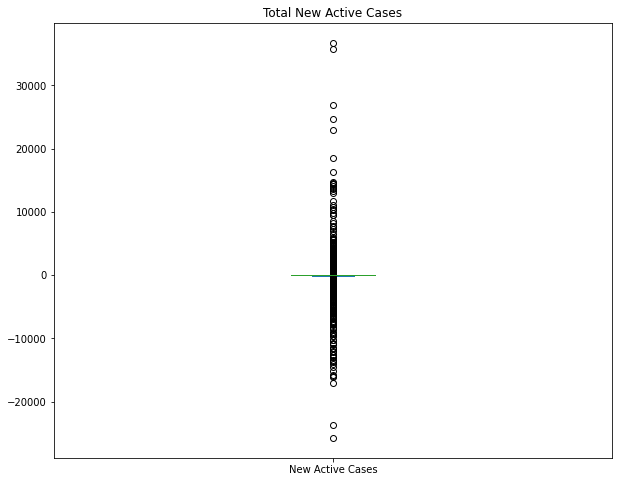

In [25]:
df['New Active Cases'].plot(kind='box', title='Total New Active Cases', figsize=(10,8))
plt.show()

### Outliers

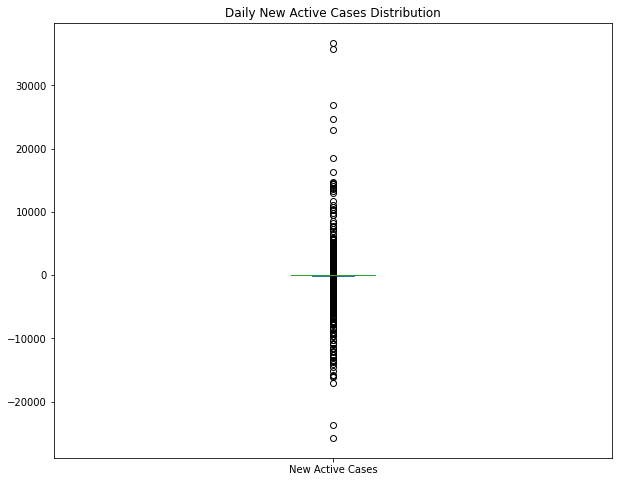

In [27]:
df['New Active Cases'].plot(kind='box', title='Daily New Active Cases Distribution', figsize=(10,8))
plt.show()

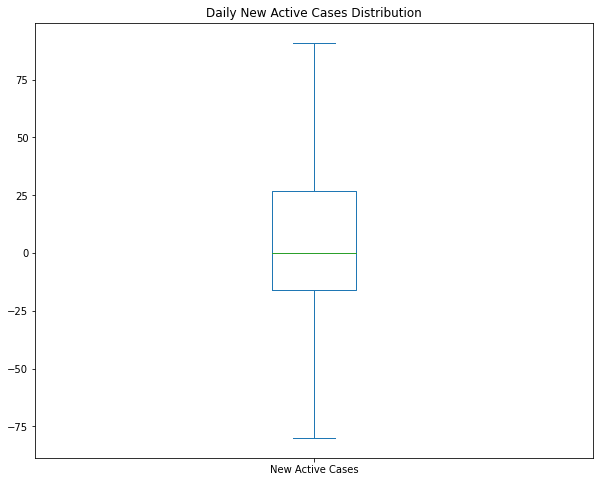

In [29]:
df['New Active Cases'].plot(kind='box', title='Daily New Active Cases Distribution', figsize=(10,8), showfliers=False)
plt.show()

## Variance and Standard Deviation

In [30]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


### Variance

In [31]:
print(df['New Active Cases'].var())

878369.1616056708


### Standard Deviation

In [32]:
print(df['New Active Cases'].std())

937.2135090819331


### Z Score

In [34]:
help(stats.gaussian_kde)

Help on class gaussian_kde in module scipy.stats.kde:

class gaussian_kde(builtins.object)
 |  gaussian_kde(dataset, bw_method=None, weights=None)
 |  
 |  Representation of a kernel-density estimate using Gaussian kernels.
 |  
 |  Kernel density estimation is a way to estimate the probability density
 |  function (PDF) of a random variable in a non-parametric way.
 |  `gaussian_kde` works for both uni-variate and multi-variate data.   It
 |  includes automatic bandwidth determination.  The estimation works best for
 |  a unimodal distribution; bimodal or multi-modal distributions tend to be
 |  oversmoothed.
 |  
 |  Parameters
 |  ----------
 |  dataset : array_like
 |      Datapoints to estimate from. In case of univariate data this is a 1-D
 |      array, otherwise a 2-D array with shape (# of dims, # of data).
 |  bw_method : str, scalar or callable, optional
 |      The method used to calculate the estimator bandwidth.  This can be
 |      'scott', 'silverman', a scalar constant

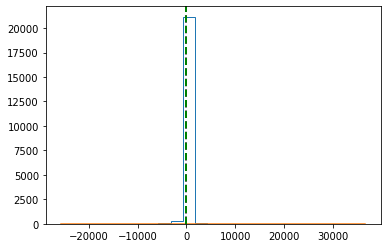

In [35]:
NAC = df['New Active Cases']
density = stats.gaussian_kde(NAC)
n, x, _ = plt.hist(NAC, histtype='step', bins=25)  
plt.plot(x, density(x)*2**7.5)
plt.axvline(NAC.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(NAC.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()